# Logistic Regression

- Logistic Regression is a supervised learning algorithm used primarily for **binary classification** tasks.
- Despite the name "regression," it is not used for predicting continuous values — instead, it predicts **probabilities of classes** (e.g., whether an email is spam or not).

## Mathematical Notation

### Linear combination of inputs
$z = W^TX+b$

### Sigmoid Function

$\sigma(z) = \frac{1}{1 + e^{-z}}$


### Optimization (Gradient Descent)
$\mathbf{w} := \mathbf{w} - \alpha \cdot \nabla_\mathbf{w} \mathcal{L(w)}$

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \dots
$

- $x_1$, $x_2$, $x_3$,… : independent variables
- $b_0$: intercept of the line
- $b_1$, $b_2$, …: coefficients


### NLL Loss Function
- Binary classification

    $\mathcal{L}_{\text{binary}} = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$

- Multi-class classification


    $\mathcal{L}_{\text{multi-class}} = - \log \hat{y}_c$


    $\text{where } \hat{y}_c = \text{predicted probability of the correct class } c$


## Dataset

- Download the dataset by click <a href="https://www.kaggle.com/datasets/shailashahidullah/social-network-ads-csv" target="_blank">Social_Network_Ads.csv (10.93 KB)</a>
    - Download URL: <a href="https://www.kaggle.com/datasets/shailashahidullah/social-network-ads-csv" target="_blank">https://www.kaggle.com/datasets/shailashahidullah/social-network-ads-csv</a>
- Sample Notebook codes from Kaggle
    - Kaggle Access URL: <a href="https://www.kaggle.com/code/shailashahidullah/assignment-titanic-dataset-practice" target="_blank">https://www.kaggle.com/code/shailashahidullah/assignment-titanic-dataset-practice</a>
- Sample code from textbook
    - Github Access URL: <a href="https://github.com/KMA-AIData/ML/blob/main/CH04/CH04_%EC%8B%A4%EC%8A%B5_logistic_regression.ipynb" target="_blank">https://github.com/KMA-AIData/ML/blob/main/CH04/CH04_%EC%8B%A4%EC%8A%B5_logistic_regression.ipynb</a>
- Or just use the file (07_1_social_network_ads.csv) provided by professor Giseop Noh

## Practice Steps

0. Import libraries and packages

1. (Data) Load data and perform feature scaling
2. (Data) Split data into training and testing sets
3. (Model) Build the model
4. (Model Training) Train the model
5. (Model Evaluation) Evaluate the model's performance
6. (Result) Visualize the model's operation

## Logistic Regression Model Using scikit-learn Library

### 0. Import necessary libraries and packages

In [66]:
# Import numpy, matplotlib, pandas as np, plt, pd respectively.
# Import scikit-learn (sklearn) and the necessary packages.
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1. Load data and perform feature scaling

In [67]:
# Load the dataset (Social_Network_Ads.csv) and standardize it through feature scaling.
dataset = pd.read_csv('07_1_social_network_ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Check shape
print(X.shape, y.shape)
dataset

(400, 2) (400,)


User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [68]:
# Transform the entire dataset X into a standard normal distribution using mean and variance
sc = StandardScaler()
X = sc.fit_transform(X) 

### 2. Split data into training and testing sets

In [69]:
# Split X (feature vector) and y (actual values) into training and testing datasets.
# Use test_size to set the ratio of training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_train.shape}')

X_train: (300, 2)
X_test: (100, 2)
y_train: (300,)
y_test: (300,)


### 3. Build the model




In [70]:
# Load the logistic regression model from the scikit-learn library.
classifier = LogisticRegression()

### 4. Train the model




In [71]:
# Train the model using the fit function.
# The fit function implements 1) weight initialization, 2) loss function calculation, and 3) weight update.
classifier.fit(X_train, y_train) # Only training data is used during the training phase
w_1 = classifier.coef_
w_0 = classifier.intercept_
print(w_1)
print(w_0)

[[2.31551264 1.14039584]]
[-1.09602631]


### 5. Evaluate the model's performance


In [72]:
# Extract predictions obtained through logistic regression using the predict function and evaluate them with the test data.
y_pred = classifier.predict(X_test) # Only test data is used during the prediction phase
result = sklearn.metrics.accuracy_score(y_test, y_pred) # Model accuracy
print(f'Accuracy: {result}')

Accuracy: 0.82


### 6. Visualize the model's operation

In [73]:
# Function to plot the decision boundary of the logistic regression model
# 로지스틱 회귀 모델의 결정 경계를 시각화하는 함수
def plot_logistic_regression_result(X_set, y_set, classifier):
    # Create a grid of points covering the feature space (Age and Estimated Salary)
    # 특징 공간(나이와 예상 급여)을 포함하는 격자 점 생성
    X1, X2 = np.meshgrid(
        np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), # Grid for the first feature
        # 첫 번째 특징(나이)에 대한 격자 생성
        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)  # Grid for the second feature
        # 두 번째 특징(예상 급여)에 대한 격자 생성
    )

    # Predict the class for each point in the grid and reshape the predictions to match the grid shape
    # 격자 내 각 점에 대해 클래스를 예측하고, 예측 결과를 격자 모양에 맞게 변환
    plt.contourf(
        X1, X2,  # Grid points / 격자 점
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Predictions reshaped to grid / 격자 형태로 변환된 예측값
        alpha = 0.3,  # Transparency of the decision boundary / 결정 경계의 투명도
        cmap = ListedColormap(('red', 'green'))  # Colors for the two classes / 두 클래스에 대한 색상
    )

    # Set the limits for the x-axis and y-axis of the plot
    # 그래프의 x축과 y축 범위 설정
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot the actual data points on top of the decision boundary
    # 결정 경계 위에 실제 데이터 포인트 시각화
    for i, j in enumerate(np.unique(y_set)):  # Loop through each unique class in the dataset
        # 데이터셋의 각 고유 클래스에 대해 반복
        plt.scatter(
            X_set[y_set == j, 0],  # Data points for the first feature (Age) / 첫 번째 특징(나이)에 대한 데이터 포인트
            X_set[y_set == j, 1],  # Data points for the second feature (Estimated Salary) / 두 번째 특징(예상 급여)에 대한 데이터 포인트
            color = ListedColormap(('red', 'green'))(i),  # Color corresponding to the class / 클래스에 해당하는 색상
            label = 'Purchased' if j == 1 else 'Not Purchased'  # Label for the class / 클래스에 대한 레이블 (구매 여부 표시)
        )

    # Add a title and labels for the axes
    # 그래프 제목과 축 레이블 추가
    plt.title('Logistic Regression (Training set)')  # Title of the plot / 그래프 제목
    plt.xlabel('Age')  # Label for the x-axis / x축 레이블
    plt.ylabel('Estimated Salary')  # Label for the y-axis / y축 레이블

    # Add a legend to distinguish between the classes
    # 클래스 간 구분을 위한 범례 추가
    plt.legend()

    # Display the plot
    # 그래프 출력
    plt.show()

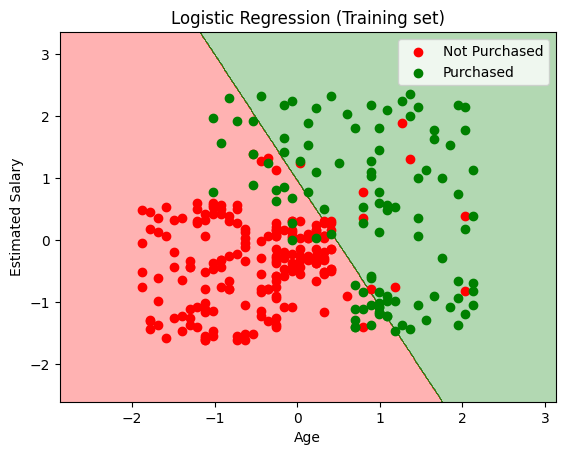

In [74]:
# Visualize the train dataset
plot_logistic_regression_result(X_train, y_train, classifier)

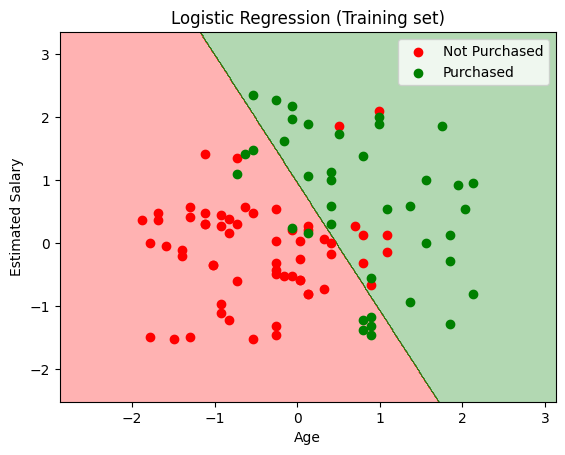

In [75]:
# Visualize the test dataset.
plot_logistic_regression_result(X_test, y_test, classifier)

## [Practice 4-2] Logistic Regression Model Implemented by Defining Functions

### 1. Load data and perform feature scaling

In [76]:
# Load the dataset (Social_Network_Ads.csv) and standardize it through feature scaling.
dataset = pd.read_csv('07_1_social_network_ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X) # Transform the training data X into a standard normal distribution using mean and variance

### 2. Split data into training and testing sets

In [77]:
# Split X (feature vector) and y (actual values) into training and testing datasets.
# Use test_size to set the ratio of training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 3. Build the model

In [78]:
# Declare the functions and variables required for logistic regression.
w_2 = 1 # Initialize weights
w_1 = 1
w_0 = 1
lr = 0.1 # Learning rate (typically 0 < lr < 1)

def sigmoid(x):
		return 1.0/(1 + np.exp(-x)) # exp(x) is equivalent to the exponential function (e^(x))

def BCE_loss(y, y_hat): # Binary Cross Entropy loss
		loss = np.mean(y * (np.log(y_hat)) + (1-y) * np.log(1-y_hat))
		return -loss

def gradient_descent(X, y, y_hat): # Verify the update equation for logistic regression
		global w_2, w_1, w_0
		w_2 = w_2 - lr * (-X[0]) * (y - y_hat)
		w_1 = w_1 - lr * (-X[1]) * (y - y_hat)
		w_0 = w_0 - lr * (-1) * (y - y_hat)

### 4. Train the model

In [79]:
# Train the model using the implemented functions.
# This function implements 1) weight initialization, 2) loss function calculation, and 3) weight update.
for epoch in range(100): # Set the desired number of iterations
		for X, y in zip(X_train, y_train):
				y_hat = sigmoid(X[0] * w_2 + X[1] * w_1 + w_0) # Extract the model's predictions
				loss = BCE_loss(y, y_hat) # Calculate the value of the loss function
				gradient_descent(X, y, y_hat) # Update w1, w0 using the value of the loss function through gradient descent
print(w_2, w_1, w_0)

2.6403713018077064 1.5941124018564723 -1.3225304890221656


### 5. Evaluate the model's performance

In [80]:
# predict 함수를 통해 로지스틱 회귀로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
def predict(X):
    global w_2, w_1, w_0
    preds = sigmoid(X[:, 0] * w_2 + X[:, 1] * w_1 + w_0) # 특징 벡터와 가중치를 활용
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds] # 예측 결과가 0.5 이상이면 1, 그렇지 않으면 0
    return np.array(pred_class)

y_hat = predict(X_test)
result = sklearn.metrics.accuracy_score(y_test, y_hat)
print(f'Accuracy: {result}')

Accuracy: 0.82


### Modify hard coded functions based above

In [81]:
class MyLogisticRegression:
    def __init__(self, X, y, num_epoch=100):
        self.X = X
        self.y = y
        self.w_2 = 1  # weight for the first feature
        self.w_1 = 1  # weight for the second feature
        self.w_0 = 1  # bias term
        self.lr = 0.1
        self.num_epoch = num_epoch

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def BCE_loss(self, y, y_hat):
        '''Binary Cross Entropy loss'''
        epsilon = 1e-15  # to avoid log(0)
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss

    def gradient_descent(self, X_sample, y, y_hat):
        # Update weights and bias using gradient descent for the current sample
        self.w_2 = self.w_2 - self.lr * (-X_sample[0]) * (y - y_hat)
        self.w_1 = self.w_1 - self.lr * (-X_sample[1]) * (y - y_hat)
        self.w_0 = self.w_0 - self.lr * (-1) * (y - y_hat)

    def train(self):
        for epoch in range(self.num_epoch):
            total_loss = 0
            for X_sample, y_sample in zip(self.X, self.y):
                y_hat = self.sigmoid(X_sample[0] * self.w_2 + X_sample[1] * self.w_1 + self.w_0)
                loss = self.BCE_loss(y_sample, y_hat)
                total_loss += loss
                self.gradient_descent(X_sample, y_sample, y_hat)
        print("Final weights:", self.w_2, self.w_1, self.w_0)

    def predict(self, X):
        preds = self.sigmoid(X[:, 0] * self.w_2 + X[:, 1] * self.w_1 + self.w_0)
        return np.array([1 if i > 0.5 else 0 for i in preds])

    def evaluate(self, X, y):
        y_hat = self.predict(X)
        result = sklearn.metrics.accuracy_score(y, y_hat)
        print("Accuracy:", result)
        return result

In [82]:
my_classifier = MyLogisticRegression(X_train, y_train)
my_classifier.train()
my_classifier.predict(X_test)

Final weights: 2.6403713018077064 1.5941124018564723 -1.3225304890221656


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

### 6. Visualize the model's operation

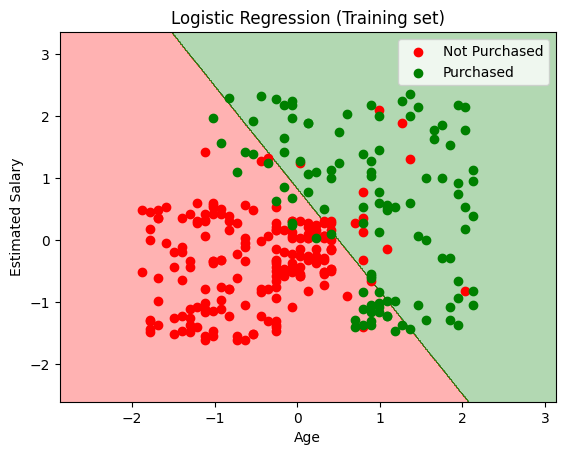

In [83]:
# Visualize the training dataset (red).
plot_logistic_regression_result(X_train, y_train, my_classifier)
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#               alpha = 0.3, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

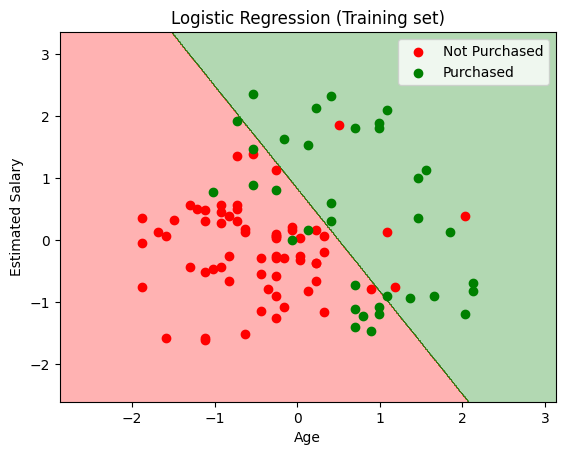

In [84]:
# Visualize the test dataset (green).
plot_logistic_regression_result(X_test, y_test, my_classifier)

# X_set, y_set = X_test, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#               alpha = 0.3, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                  c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()